### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量


In [2]:
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv')

columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url', 'html_url', 'followers_url', 
    'following_url', 'gists_url', 'starred_url', 'subscriptions_url', 'organizations_url', 'repos_url', 'events_url', 
    'received_events_url', 'type', 'site_admin', 'name', 'company', 'blog', 'location', 'email', 'hireable', 'bio', 
    'twitter_username', 'public_repos', 'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]
data = raw_data[columns]

original_size = data.shape[0]
data_cleaned = data.drop_duplicates()
cleaned_size = data_cleaned.shape[0]

print(f"去重前的数据量: {original_size}")
print(f"去重后的数据量: {cleaned_size}")

去重前的数据量: 20358
去重后的数据量: 19779


### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值


In [14]:
missing_values_before = data_cleaned.isnull().sum()
print("缺失值情况：")
print(missing_values_before)

bool_columns = ['site_admin', 'hireable']
for col in bool_columns:
    data_cleaned[col] = data_cleaned[col].fillna(False).astype(bool)

text_columns = ['company', 'blog', 'location', 'email', 'bio', 'twitter_username']
for col in text_columns:
    data_cleaned[col] = data_cleaned[col].fillna('')

missing_values_after = data_cleaned.isnull().sum()
print("处理后的缺失值情况：")
print(missing_values_after)


缺失值情况：
actor_id                  0
label                     0
login                     0
id                        0
node_id                   0
avatar_url                0
url                       0
html_url                  0
followers_url             0
following_url             0
gists_url                 0
starred_url               0
subscriptions_url         0
organizations_url         0
repos_url                 0
events_url                0
received_events_url       0
type                      0
site_admin                0
name                   2589
company                   0
blog                      0
location                  0
email                     0
hireable                  0
bio                       0
twitter_username          0
public_repos              0
public_gists              0
followers                 0
following                 0
created_at                0
updated_at                0
dtype: int64
处理后的缺失值情况：
actor_id                  0
label            

### 3. 数据变换，将created_at、updated_at转为时间戳


In [15]:

data_cleaned['created_at'] = pd.to_datetime(data_cleaned['created_at'])
data_cleaned['updated_at'] = pd.to_datetime(data_cleaned['updated_at'])

print(data_cleaned[['created_at', 'updated_at']].head())

                 created_at                updated_at
0 2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00
1 2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00
2 2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00
3 2014-05-20 18:43:09+00:00 2023-10-12 12:54:59+00:00
4 2012-08-16 14:19:13+00:00 2023-10-06 11:58:41+00:00


### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）


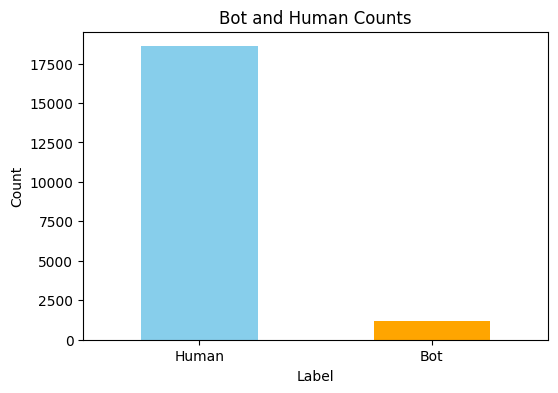

In [16]:
import matplotlib.pyplot as plt

label_counts = data_cleaned['label'].value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Bot and Human Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）


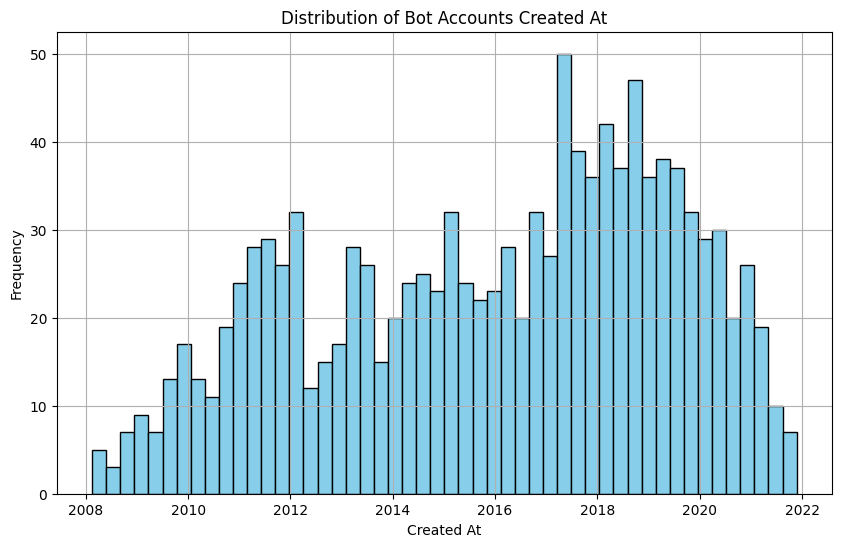

In [17]:
# 只选择 bot 类型的数据
bot_data = data_cleaned[data_cleaned['label'] == 'Bot']

# 绘制 bot 类型账号的 created_at 分布
plt.figure(figsize=(10, 6))
bot_data['created_at'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Bot Accounts Created At')
plt.xlabel('Created At')
plt.ylabel('Frequency')
plt.show()

- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）


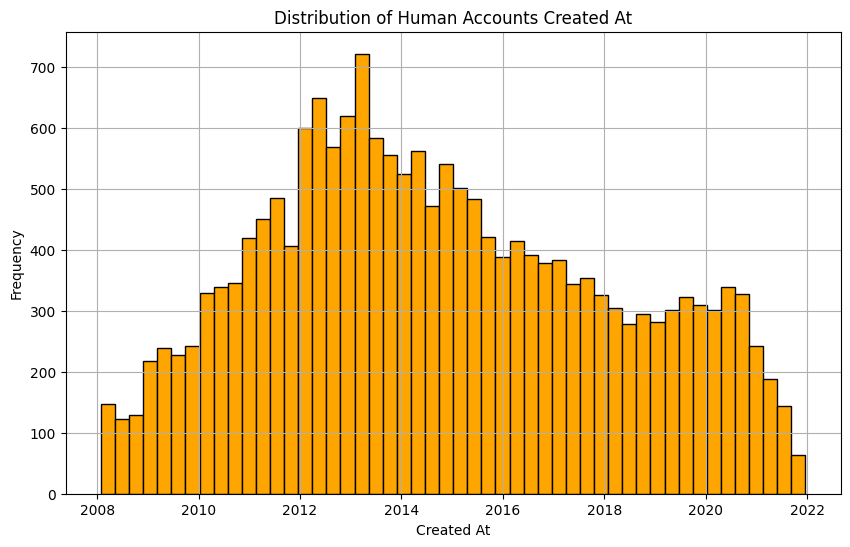

In [18]:

human_data = data_cleaned[data_cleaned['label'] == 'Human']

plt.figure(figsize=(10, 6))
human_data['created_at'].hist(bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Human Accounts Created At')
plt.xlabel('Created At')
plt.ylabel('Frequency')
plt.show()

- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）


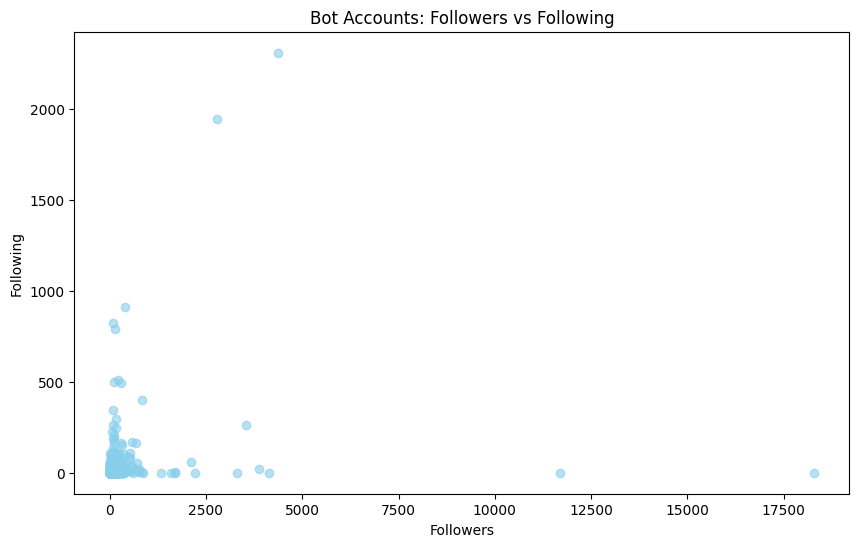

In [19]:

plt.figure(figsize=(10, 6))
plt.scatter(bot_data['followers'], bot_data['following'], color='skyblue', alpha=0.6)
plt.title('Bot Accounts: Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

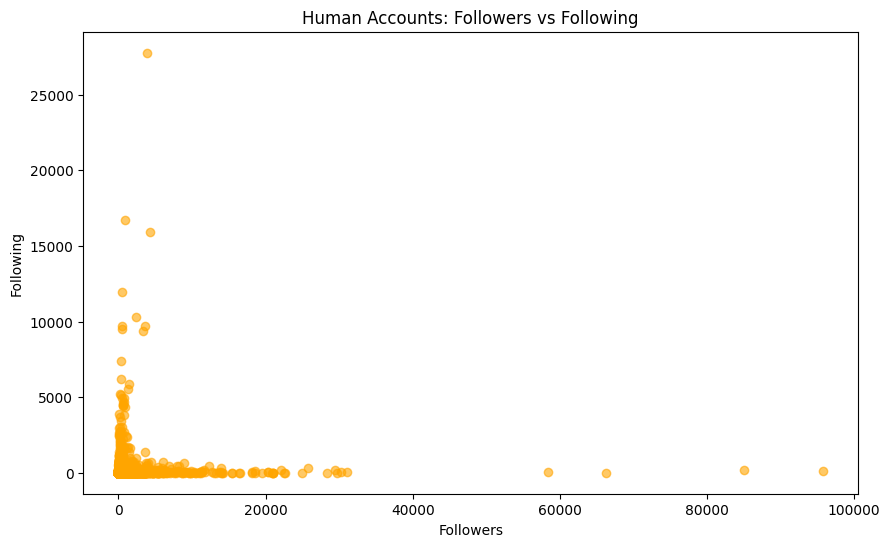

In [20]:

plt.figure(figsize=(10, 6))
plt.scatter(human_data['followers'], human_data['following'], color='orange', alpha=0.6)
plt.title('Human Accounts: Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

In [21]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]